In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df=pd.read_csv(r"C:/Users/User-PC/Downloads/Healthcare Cost & Insurance Analysis/insurance_data_engineered.csv")
print(df)
print(df.info())

      age  sex  bmi  children  smoker  charges  region_Northwest  \
0      19    0   28         0       1    16885             False   
1      18    1   34         1       0     1726             False   
2      28    1   33         3       0     4449             False   
3      33    1   23         0       0    21984              True   
4      32    1   29         0       0     3867              True   
...   ...  ...  ...       ...     ...      ...               ...   
1333   50    1   31         3       0    10601              True   
1334   18    0   32         0       0     2206             False   
1335   18    0   37         0       0     1630             False   
1336   21    0   26         0       0     2008             False   
1337   61    0   29         0       1    29141              True   

      region_Southeast  region_Southwest  cost_deviation   cost_zscore  \
0                False              True     3614.585202  16883.903769   
1                 True             

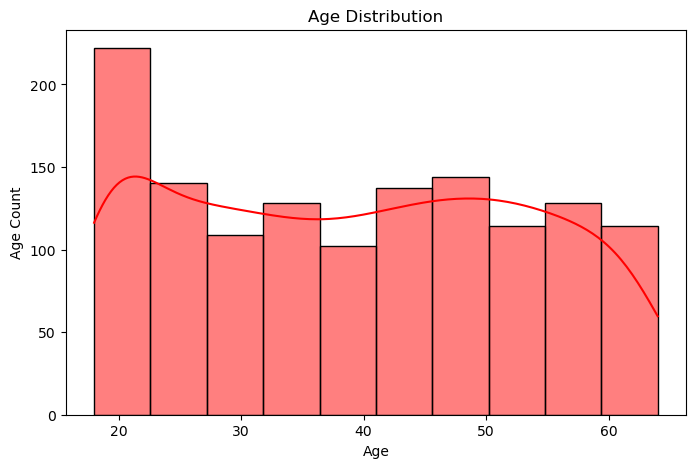

In [11]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=10, color="r",kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Age Count")
plt.savefig("age_distribution.png")
plt.show()

C:\Users\User-PC\AppData\Local\Temp\ipykernel_2524\2176470322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker',y='charges',data=df, palette='Set2', showmeans=True)


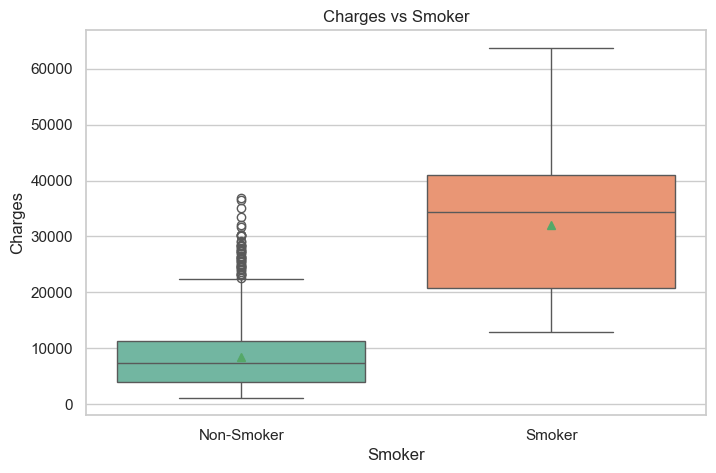

In [21]:
#Charges by Smoker Status
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.boxplot(x='smoker',y='charges',data=df, palette='Set2', showmeans=True)
plt.title("Charges vs Smoker")
plt.xticks([0,1],["Non-Smoker", "Smoker"])
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.savefig("smoker_charges.png")
plt.show()


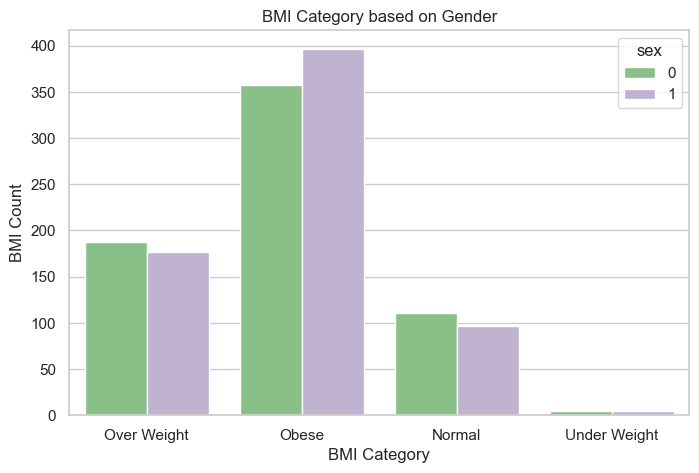

In [29]:
#BMI Category Count#
plt.figure(figsize=(8,5))
sns.countplot(x="bmi_category", palette="Accent",hue="sex", data=df)
plt.title("BMI Category based on Gender")
plt.xlabel("BMI Category")
plt.ylabel("BMI Count")
plt.savefig("bmi_cat_gen.png")
plt.show()

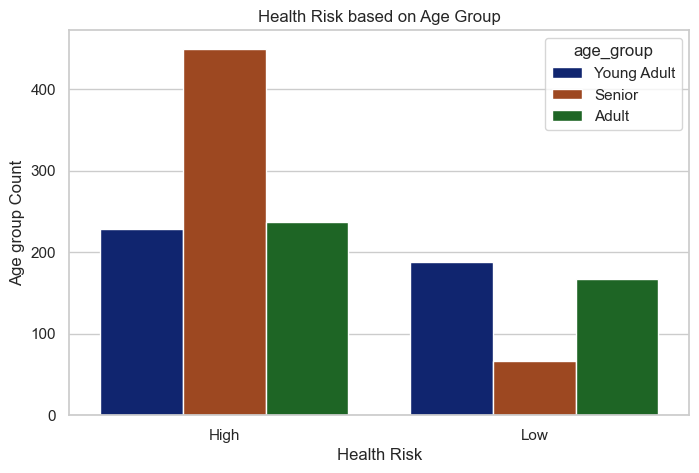

In [38]:
#Health Risk by Age and Smoking
plt.figure(figsize=(8,5))
sns.countplot(x="health_risk", data=df,hue="age_group" ,palette="dark")
plt.title("Health Risk based on Age Group")
plt.xlabel("Health Risk")
plt.ylabel("Age group Count")
plt.savefig("health_risk_age_grp.png")
plt.show()


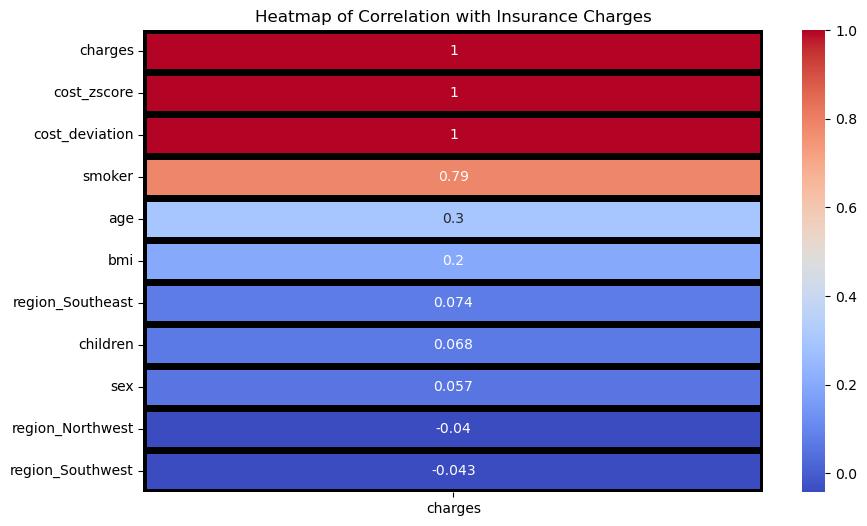

(None,)

In [16]:
#Heatmap
corr=df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr[['charges']].sort_values(by="charges", ascending=False),annot=True, cmap="coolwarm", linecolor="black", linewidth=5)
plt.title("Heatmap of Correlation with Insurance Charges")
plt.savefig("Heatmap_charges.png")
plt.show(),

In [31]:
#region disparities
region_cols=[col for col in df.columns if col.startswith('region_')]

for col in region_cols:
    avg_charge=df[df[col]==True]['charges'].mean()
    print(f"Average charges for {col}:{avg_charge:.2f}")


Average charges for region_Northwest:12417.58
Average charges for region_Southeast:14735.41
Average charges for region_Southwest:12346.93


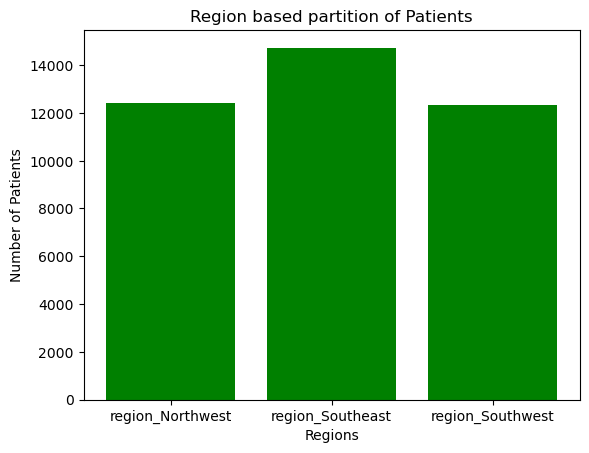

In [42]:
avg_charges={col: df[df[col] == True]['charges'].mean() for col in region_cols }
plt.bar(avg_charges.keys(), avg_charges.values(), color="g")
plt.title("Region based partition of Patients")
plt.xlabel("Regions")
plt.ylabel("Number of Patients")
plt.savefig("region_partition.png")
plt.show()

In [53]:
#4. Ideal Customer Profiles for Low-Risk Insurance
low_risk=df[(df['smoker']==1) & (df['bmi']>25 ) & (df['age']>30)]
print(low_risk[['age','bmi','smoker','charges']].describe())


              age         bmi  smoker       charges
count  140.000000  140.000000   140.0    140.000000
mean    47.107143   33.064286     1.0  37911.014286
std      9.961578    4.973615     0.0  10423.980767
min     31.000000   26.000000     1.0  19041.000000
25%     38.750000   28.750000     1.0  28677.000000
50%     47.000000   33.000000     1.0  40228.000000
75%     56.000000   36.000000     1.0  45704.000000
max     64.000000   48.000000     1.0  63770.000000


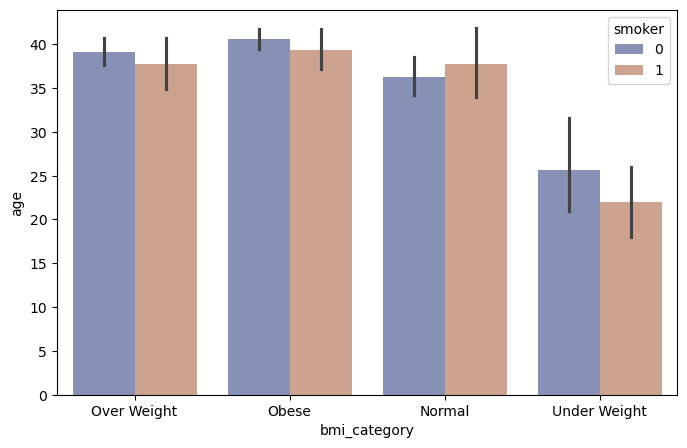

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(x="bmi_category",y="age",hue="smoker",palette="dark",data=df,alpha=0.5)
plt.savefig("")
plt.show()


In [66]:
print(df)

      age  sex  bmi  children  smoker  charges  region_Northwest  \
0      19    0   28         0       1    16885             False   
1      18    1   34         1       0     1726             False   
2      28    1   33         3       0     4449             False   
3      33    1   23         0       0    21984              True   
4      32    1   29         0       0     3867              True   
...   ...  ...  ...       ...     ...      ...               ...   
1333   50    1   31         3       0    10601              True   
1334   18    0   32         0       0     2206             False   
1335   18    0   37         0       0     1630             False   
1336   21    0   26         0       0     2008             False   
1337   61    0   29         0       1    29141              True   

      region_Southeast  region_Southwest  cost_deviation   cost_zscore  \
0                False              True     3614.585202  16883.903769   
1                 True             